# CASE STUDY: FASHION CLASS CLASSIFICATION 

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#  Step  #1 : IMPORTING DATA

In [2]:
# Update if necessary to point to the training data
train_data_path = "/Users/sara/Downloads/P39-Fashion-MNIST-Datasets/fashion-mnist_train.csv"
test_data_path = "/Users/sara/Downloads/P39-Fashion-MNIST-Datasets/fashion-mnist_test.csv"

In [3]:
train_data_df = pd.read_csv(train_data_path)
test_data_df= pd.read_csv(test_data_path)

# STEP #2 : VISUALIZATION OF THE DATASET

In [4]:
train_data_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data_df.shape

(60000, 785)

In [7]:
test_data_df.shape

(10000, 785)

In [8]:
training = np.array(train_data_df,  dtype = 'float32')
testing = np.array(test_data_df, dtype = "float32")

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
training.shape

(60000, 785)

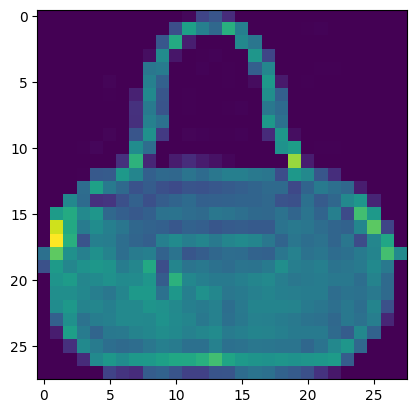

In [11]:
plt.imshow(training[20,1:].reshape(28,28))

9.0

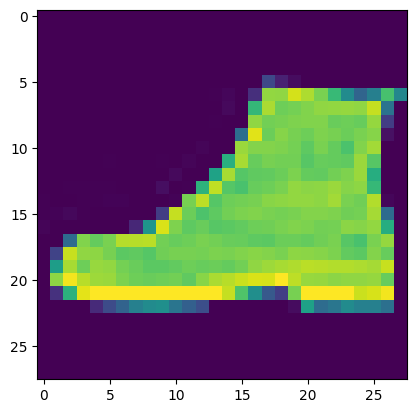

In [12]:
import random 
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image
label = training[i,0]
label

In [13]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

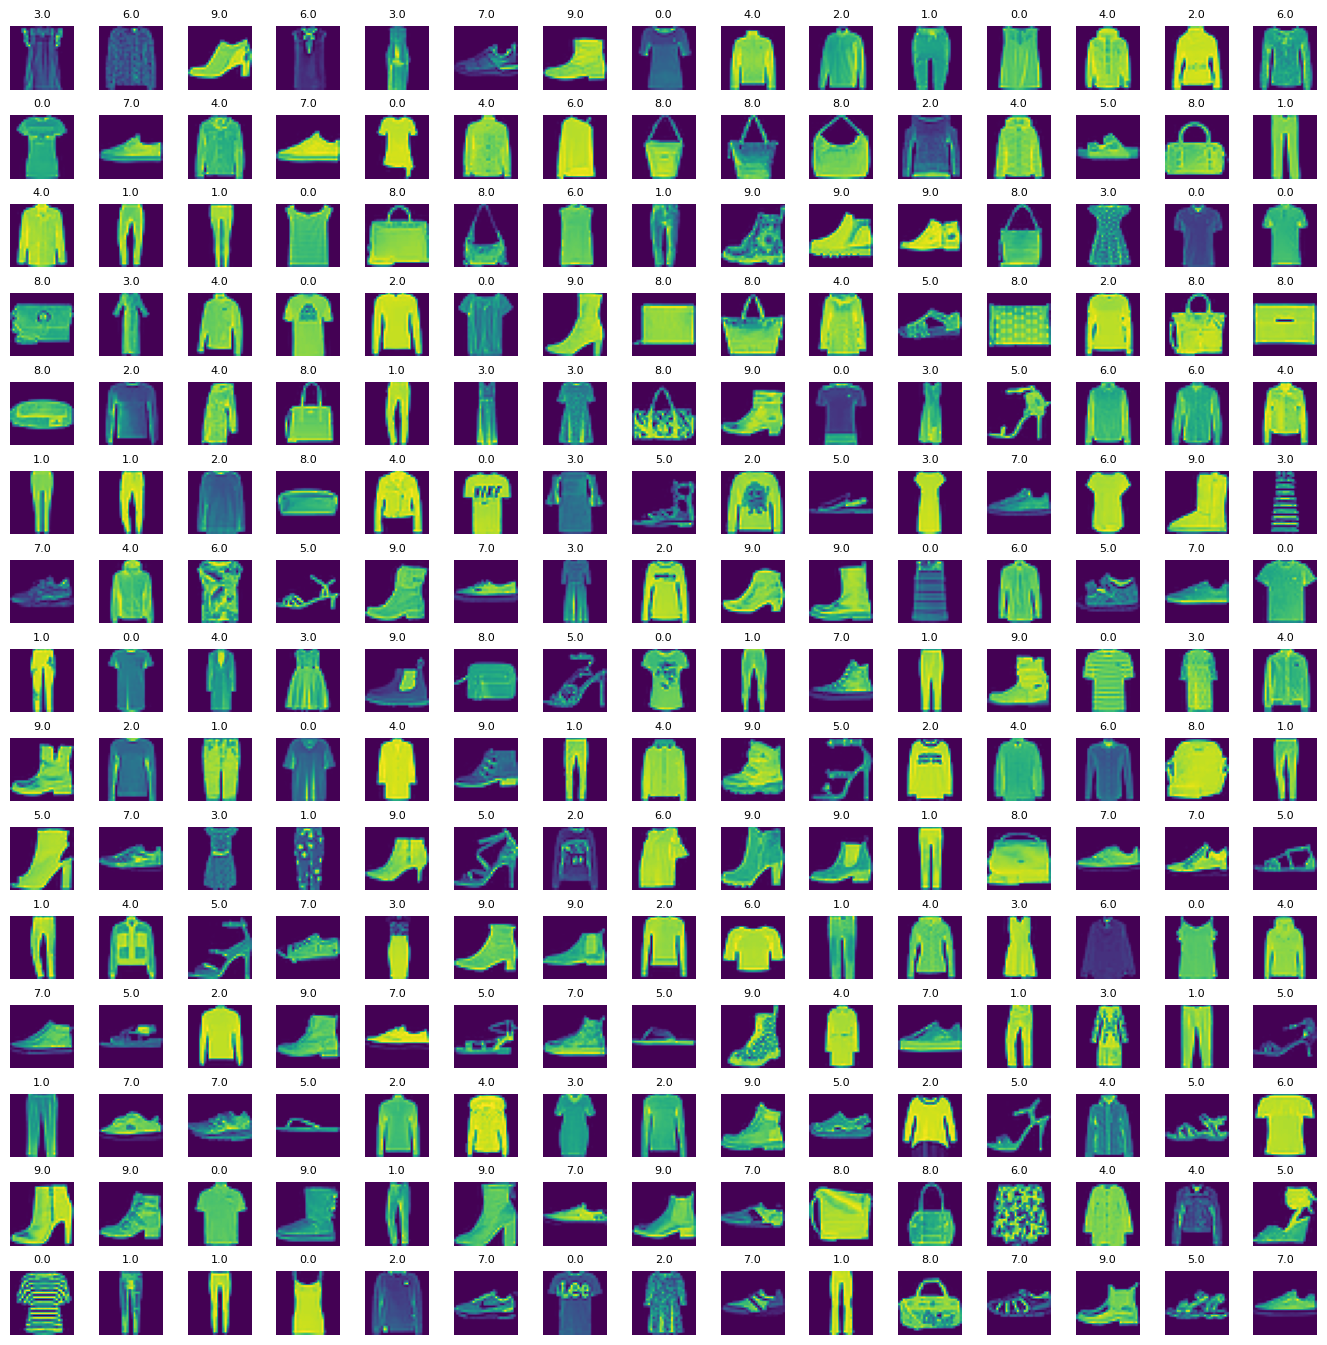

In [14]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# STEP #3: TRAINING THE MODEL

In [15]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [20]:
X_train.shape

(38400, 784)

In [21]:
y_train.shape

(38400,)

In [22]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [23]:
X_train.shape

(38400, 28, 28, 1)

In [24]:
X_test.shape

(10000, 28, 28, 1)

In [25]:
X_validate.shape

(9600, 28, 28, 1)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [30]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [33]:
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(learning_rate=0.001)

In [34]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer= optimizer,metrics =['accuracy'])

In [36]:
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = 50,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
75/75 [==============================] - 1s 12ms/step - loss: 1.5535 - accuracy: 0.5144 - val_loss: 0.8417 - val_accuracy: 0.6940
Epoch 2/50
75/75 [==============================] - 0s 6ms/step - loss: 0.7759 - accuracy: 0.7159 - val_loss: 0.6648 - val_accuracy: 0.7592
Epoch 3/50
75/75 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.7559 - val_loss: 0.5953 - val_accuracy: 0.7791
Epoch 4/50
75/75 [==============================] - 0s 6ms/step - loss: 0.6145 - accuracy: 0.7752 - val_loss: 0.5519 - val_accuracy: 0.7959
Epoch 5/50
75/75 [==============================] - 1s 11ms/step - loss: 0.5823 - accuracy: 0.7874 - val_loss: 0.5215 - val_accuracy: 0.8065
Epoch 6/50
75/75 [==============================] - 0s 6ms/step - loss: 0.5536 - accuracy: 0.7938 - val_loss: 0.5004 - val_accuracy: 0.8143
Epoch 7/50
75/75 [==============================] - 0s 6ms/step - loss: 0.5394 - accuracy: 0.8019 - val_loss: 0.4813 - val_accuracy: 0.8250
Epoch 8/50
75/75 [

# STEP #4: EVALUATING THE MODEL

In [37]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 433us/step - loss: 0.3611 - accuracy: 0.8656


In [38]:
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

Test Accuracy : 0.866


In [40]:
# get the predictions for the test data
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 387us/step


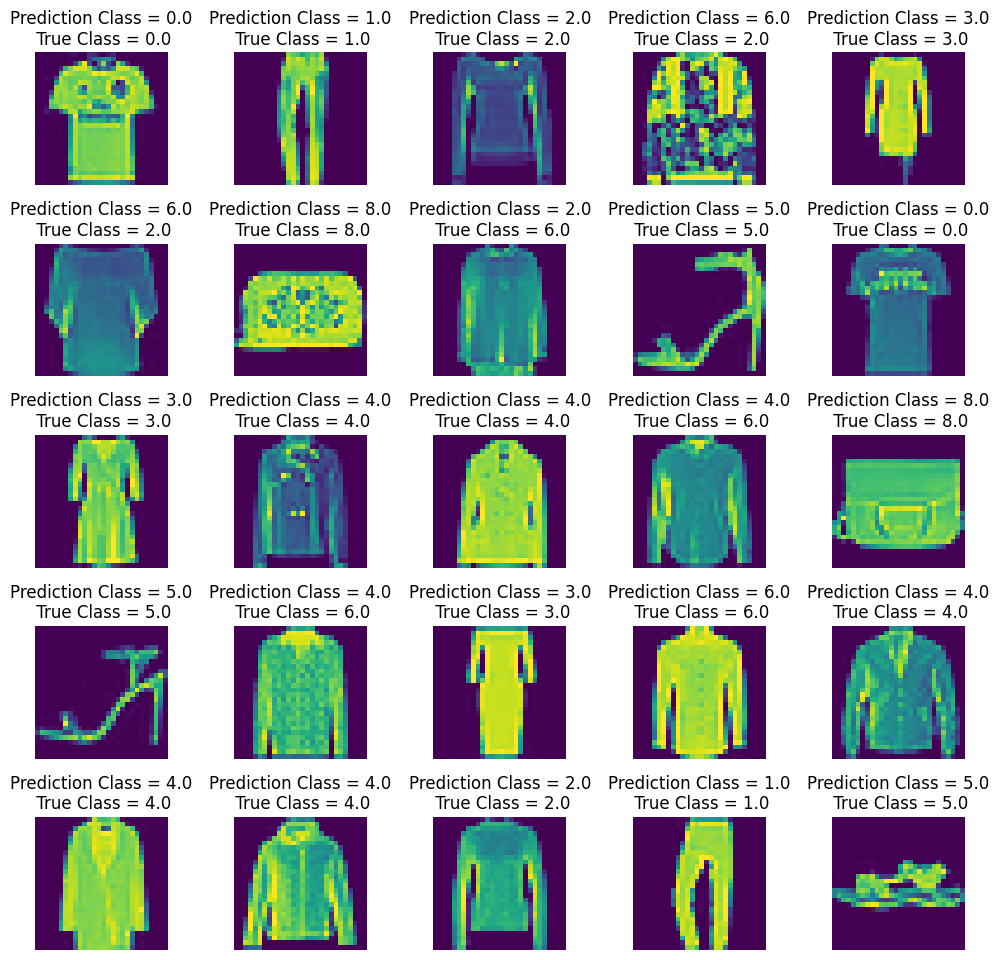

In [41]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

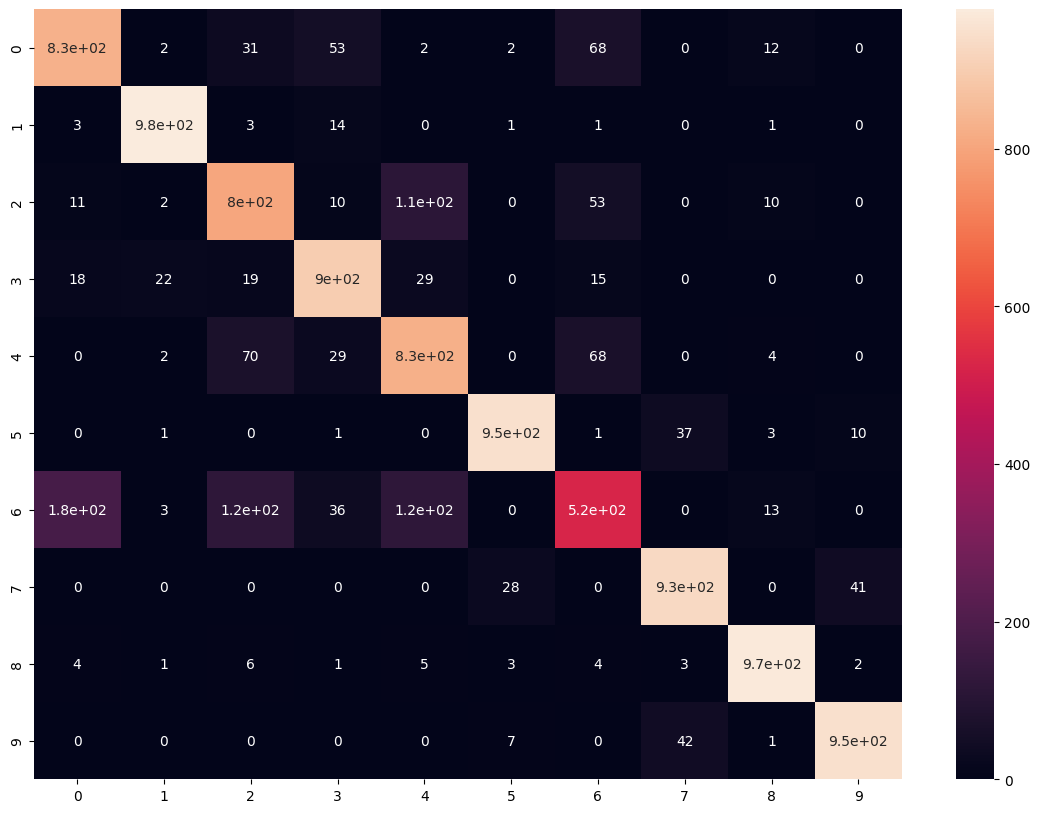

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [43]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.83      0.81      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.76      0.80      0.78      1000
     Class 3       0.86      0.90      0.88      1000
     Class 4       0.75      0.83      0.79      1000
     Class 5       0.96      0.95      0.95      1000
     Class 6       0.71      0.52      0.60      1000
     Class 7       0.92      0.93      0.92      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000

